In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("coches_dataset2.csv.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [ ]:


#the dataset came with some undefined boolean variables, so let´s erase them 
#because it will be impossible to use them, we´ll also erase the location region
#due to its illegibility

#In this case as I only want to have numerical variables, I will also drop all tbhe categorical.
df = df.drop(["manufacturer_name", "model_name","feature_0","feature_1", "feature_2", "feature_3", "feature_4",
              "feature_5", "feature_5", "feature_6", "feature_7", "feature_8", 
              "feature_8", "feature_9", "location_region", "is_exchangeable", "drivetrain",
              "state", "has_warranty", "body_type", "color", "transmission", "model_name",
              "manufacturer_name", "engine_fuel", "engine_has_gas", "engine_type"], axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   odometer_value    38531 non-null  int64  
 1   year_produced     38531 non-null  int64  
 2   engine_capacity   38521 non-null  float64
 3   price_usd         38531 non-null  float64
 4   number_of_photos  38531 non-null  int64  
 5   up_counter        38531 non-null  int64  
 6   duration_listed   38531 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 2.1 MB


In [ ]:
#Get some more info about the variables in the dataframe:
df.info()

#Know if there is any null value:
df.isnull().values.any() 

#Now how many null values are there in the variable where there are null values:
print(df['duration_listed'].isnull().sum())
print(df['engine_capacity'].isnull().sum())
#There is 1 nan in "duration_listed" variable and 10 in engine_capacity.

#Fill nan´s with the mean average of the respective variable
df['duration_listed'].fillna((df['duration_listed'].mean()), inplace=True)
df['engine_capacity'].fillna((df['engine_capacity'].mean()), inplace=True)
#Recheck if there is any null value
print(df.isnull().values.any())

df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   odometer_value    38531 non-null  int64  
 1   year_produced     38531 non-null  int64  
 2   engine_capacity   38521 non-null  float64
 3   price_usd         38531 non-null  float64
 4   number_of_photos  38531 non-null  int64  
 5   up_counter        38531 non-null  int64  
 6   duration_listed   38531 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 2.1 MB
0
10
False


,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
0,190000,2010,2.5,10900.00,9,13,16
1,290000,2002,3.0,5000.00,12,54,83
2,402000,2001,2.5,2800.00,4,72,151
3,10000,1999,3.0,9999.00,9,42,86
4,280000,2001,2.5,2134.11,14,7,7


Before we do PCA, we have to center and scale the data.

After centering, the average value for each gene will be 0, and after scaling, the sd(standard deviation) for the values for each gene will be 1.



In [ ]:
from sklearn.preprocessing import StandardScaler

#Notice that we pass the transpose of our dataframe, because the 
#scale function expects the features to be rows instead of columns


scaled_data = StandardScaler().fit_transform(df.T)
print(scaled_data)

#scaled_data = preprocessing.scale(df.T) ·This would be another way 


[[ 2.4456558   2.44913884  2.44942178 ...  2.44945408  2.39947342
   2.44934663]
 [-0.40986371 -0.40017934 -0.39995535 ... -0.40501648 -0.2677772
  -0.39845248]
 [-0.44035712 -0.41995652 -0.41419158 ... -0.4123609  -0.56400666
  -0.41768889]
 ...
 [-0.44025838 -0.41986748 -0.4141809  ... -0.41236274 -0.56326571
  -0.41767348]
 [-0.44019762 -0.41945195 -0.4136965  ... -0.41214202 -0.54118558
  -0.41700903]
 [-0.44015206 -0.41916504 -0.41313375 ... -0.41101635 -0.49169051
  -0.41162599]]


Now we create a PCA object, sklearn uses objects that can be trained using one dataset and applied to another dataset.

In [ ]:
pca = PCA()

#Here there will be calculated the loading scores and the variation each 
#principal component accounts for
pca.fit(scaled_data)

#here we generate coordinates for a pca graph based on the loading scores
#and the scaled data
pca_data = pca.transform(scaled_data)

Let´s draw a graph:

In [ ]:
#We´ll plor in order to see how many principal components should
#go into the final plot.
per_var = np.round(pca.explained_variance_ratio_*100, decimals =2)

#Using a list comprehension
labels = ["PC" + str(x) for x in range(1, len(per_var)+1)]

Now we´ll use matplotlib to create a barplot that shows the percentage of explained variance of each of the components

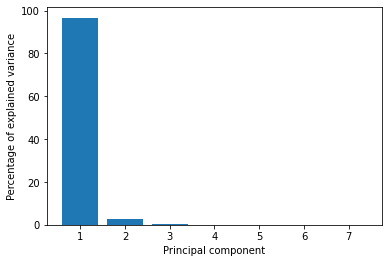

In [ ]:
x = range(1,len(per_var)+1)
plt.bar(x, height = per_var)
plt.ylabel("Percentage of explained variance")
plt.xlabel("Principal component")
plt.show()


As we can see almost all the variation is along the first Principal Component(PC), using PC1 and PC2, it should do a very nice representation of the original data

Now we´ll get our dataframe with the pca applied, there we´ll keep watching the explained variance ratio of each component and each feature.

In order to do this we´ll put the new coordinates, created by the standard scaler into a matrix where the rows have sample labels and the columns have PC labels.

In [ ]:
pca_df = pd.DataFrame(pca_data, index = df.keys() , columns = labels )
print(pca_df)

Let´s look at the loading scores for PC1 ti determine which cars had the largest influence on separating the two clusters along the x-axis

In [ ]:
#creation of a pandas series object with the loading scores of PC1
loading_scores = pd.Series(pca.components_[0])
#Sort the loading scores based on their magnitude or absolute value
sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)
#Getting the top 10 cars that most influenced the data
top_10 = sorted_loading_scores[0:10].index.values

print(loading_scores[top_10])

16515    0.005182
26891    0.005182
6884     0.005182
16273    0.005182
18898    0.005182
31195    0.005182
30588    0.005182
35831    0.005182
12693    0.005182
10151    0.005182
dtype: float64


As you can see values are so similar, then a lot of values played a role in separating the samples.

In [ ]:
#Show the total explained variance by the two principal components
total_explained_data= per_var[0]+ per_var[1]
print(total_explained_data)

99.55


ALMOST ALL (99.55%) THE DATA CAN BE EXPLAINED JUST WITH 2 PRINCIPAL COMPONENTS, instead of 7 features, **THE PCA HAS BEEN SUCCESSFUL**